# Assignment 1

Andrew Abbott, Patrick McDevitt, Preeti Swaminathan, Vivek Bejugama  
MSDS 7331  
September 20, 2017

The data is located at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

## Business Understanding:

## Data Understanding:  



In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/OnlineNewsPopularity.csv', 
                 usecols=[*range(2,39), *range(44, 61)])
# strip leading spaces from column names
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 54 columns):
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null float64
data_channel_is_socmed           39644 non-null float64
data_channel_is_tech             39644 non-null flo

To verify data quality I check for missing values, outliers, and duplicates. 

Duplicates could occur if the same event was reported by multiple sources. I will check for duplicates and remove them.

In [21]:
# Convert the indicator variables to boolean.
d = {0:False, 1:True}

df['data_channel_is_lifestyle'] = df['data_channel_is_lifestyle'].map(d)
df['data_channel_is_entertainment'] = df['data_channel_is_entertainment'].map(d)
df['data_channel_is_bus'] = df['data_channel_is_bus'].map(d)
df['data_channel_is_socmed'] = df['data_channel_is_socmed'].map(d)
df['data_channel_is_tech'] = df['data_channel_is_tech'].map(d)
df['data_channel_is_world'] = df['data_channel_is_world'].map(d)

df['weekday_is_monday'] = df['weekday_is_monday'].map(d)
df['weekday_is_tuesday'] = df['weekday_is_tuesday'].map(d)
df['weekday_is_wednesday'] = df['weekday_is_wednesday'].map(d)
df['weekday_is_thursday'] = df['weekday_is_thursday'].map(d)
df['weekday_is_friday'] = df['weekday_is_friday'].map(d)
df['weekday_is_saturday'] = df['weekday_is_saturday'].map(d)
df['weekday_is_sunday'] = df['weekday_is_sunday'].map(d)
df['is_weekend'] = df['is_weekend'].map(d)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 54 columns):
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null bool
data_channel_is_entertainment    39644 non-null bool
data_channel_is_bus              39644 non-null bool
data_channel_is_socmed           39644 non-null bool
data_channel_is_tech             39644 non-null bool
data_chann

### Visualize appropriate statistics:

Simple statistics for the 5 remaining numerical attributes are given below. 

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000
average_token_length,39644.0,4.548239,0.844406,0.00000,4.478404,4.664082,4.854839,8.041534


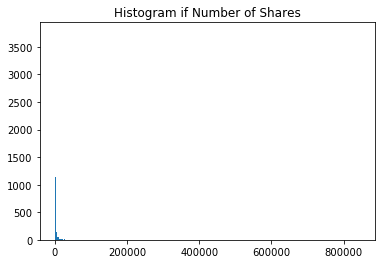

In [23]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
plt.hist(df.shares, bins='auto')
plt.title("Histogram if Number of Shares")
plt.show()

### Interesting Attributes

### Interesting Features

### Other Features that could be added

# Dimensionality Reduction

In [205]:
from pandas.tools.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA